In [3]:
#convert the dataset folder into pandas dataframe
import pandas as pd
# from src.data_clean import build_dataframe
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
# from tqdm import tqdm

/home/katrine_bay/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import pandas as pd
import os
from tqdm import tqdm

def build_dataframe(signal="BVP"):
    """
    Build a dataframe from the dataset folder
    :param signal: the signal to extract
    :return: a dataframe containing the signal

    Possible signals:
    - BVP: Blood Volume Pulse
    - EDA: Electrodermal Activity
    - TEMP: Temperature
    - HR: Heart Rate
    - response: response to the questionnaire
    """
    df = pd.DataFrame()
    for dirname, _, filenames in os.walk('dataset'):
        for filename in filenames:
            try:
                _, group, ID, round, phase = dirname.split("/")
            except ValueError:
                _, group, ID, ID2, round, phase = dirname.split("/")
            # create dataframe from csv file
            if filename.startswith(signal):
                tmp_df = pd.read_csv(os.path.join(dirname, filename))
                tmp_df["group"] = group
                if group == "D1_3":
                    tmp_df["sub_group"] = ID
                    tmp_df["ID"] = int(ID2[-1])
                else:
                    tmp_df["ID"] = int(ID[-1])
                tmp_df["round"] = int(round[-1])
                tmp_df["phase"] = int(phase[-1])
                tmp_df["time_point"] = range(len(tmp_df))
                df = pd.concat([df, tmp_df], axis=0)
        
    if signal == "response":
        df.sort_values(by=['group', 'sub_group', 'ID', 'round', 'phase'], inplace=True)
    else:
        df.sort_values(by=['group', 'sub_group', 'ID', 'round', 'phase', 'time'], inplace=True)
    df.drop(columns=['Unnamed: 0'], inplace=True)
    return df

## Testing plotting of the temperature

In [5]:
df_temp = build_dataframe("TEMP")
df_BVP = build_dataframe("BVP")
df_EDA = build_dataframe("EDA")
df_HR = build_dataframe("HR")
df_response = build_dataframe("response")

In [6]:
#create a combined dataframe containing the temperature, EDA and HR data and combine on group, ID, round, phase and remove time_point
df_combined = pd.merge(df_temp, df_EDA, on=['group', 'ID', 'round', 'phase', 'time_point'])
df_combined = pd.merge(df_combined, df_HR, on=['group', 'ID', 'round', 'phase', 'time_point'])
df_combined.drop(columns=['time_x', 'time_y', 'time', 'sub_group', 'sub_group_x', 'sub_group_y', 'ID', 'group', 'round', 'phase', ], inplace=True)
#get dummies
#df_combined = pd.get_dummies(df_combined, columns=['group', 'phase'])
#remove duplicates
#df_combined.drop_duplicates(inplace=True)
df_combined

,TEMP,time_point,EDA,HR
0,30.97,0,0.185827,76.75
1,30.97,1,0.203768,76.75
2,30.97,2,0.192234,76.73
3,30.97,3,0.189671,76.72
4,31.01,4,0.185827,76.72
...,...,...,...,...
575022,32.15,307,0.971585,79.00
575023,33.16,308,0.524331,79.33
575024,33.16,308,0.970304,79.33
575025,32.15,308,0.524331,79.33


In [7]:
df_EDA_org = df_EDA.copy()
df_BVP_org = df_BVP.copy()
df_HR_org = df_HR.copy()
df_temp_org = df_temp.copy()
df_response_org = df_response.copy()

In [8]:
# remove the columns: 'particpant_ID','puzzler','team_ID','E4_nr'

df_response = df_response.drop(columns=['particpant_ID','puzzler','team_ID','E4_nr','parent','participant_ID'])

In [9]:
df_response

,upset,hostile,alert,ashamed,inspired,nervous,determined,attentive,afraid,active,frustrated,group,ID,round,phase,time_point,difficulty,sub_group
0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,1.0,D1_1,1,1,1,0,NaN,NaN
0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,1.0,3.0,2.0,D1_1,1,1,2,0,5.0,NaN
0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,D1_1,1,1,3,0,NaN,NaN
0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,1.0,4.0,D1_1,1,2,1,0,NaN,NaN
0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,1.0,3.0,1.0,D1_1,1,2,2,0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,D1_3,2,3,2,0,1.0,D1_3_4
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,D1_3,2,3,3,0,0.0,D1_3_4
0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,D1_3,2,4,1,0,0.0,D1_3_4
0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,D1_3,2,4,2,0,2.0,D1_3_4


,upset,hostile,alert,ashamed,inspired,nervous,determined,attentive,afraid,active,frustrated,ID,round,phase,time_point,difficulty
count,312.000000,312.000000,312.000000,312.000000,310.000000,312.000000,310.000000,311.000000,311.000000,311.000000,312.000000,312.000000,312.00000,312.000000,312.0,179.000000
mean,1.346154,1.057692,2.192308,1.221154,2.183871,1.381410,2.912903,2.784566,1.051447,2.553055,2.022436,3.192308,2.50000,2.000000,0.0,3.212291
std,0.617576,0.271719,1.037034,0.549014,1.027958,0.577199,1.104050,1.113793,0.273430,1.173463,1.986160,1.964690,1.11983,0.817808,0.0,3.050081
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.0,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,2.000000,1.75000,1.000000,0.0,0.000000
50%,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000,3.000000,2.50000,2.000000,0.0,3.000000
75%,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,4.000000,1.000000,3.000000,3.000000,4.000000,3.25000,3.000000,0.0,6.000000
max,4.000000,3.000000,5.000000,4.000000,5.000000,3.000000,5.000000,5.000000,4.000000,5.000000,8.000000,8.000000,4.00000,3.000000,0.0,9.000000


In [10]:
# plot the scatterplot of the responses

# sns.scatterplot(data=df_response, x='determined', y="attentive", hue="phase", style="group")

In [11]:
# sns.histplot(data=df_response, x='determined', hue="phase", multiple="stack")
df_response[df_response.index.duplicated()]

,upset,hostile,alert,ashamed,inspired,nervous,determined,attentive,afraid,active,frustrated,group,ID,round,phase,time_point,difficulty,sub_group
0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,1.0,3.0,2.0,D1_1,1,1,2,0,5.0,NaN
0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,D1_1,1,1,3,0,NaN,NaN
0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,1.0,4.0,D1_1,1,2,1,0,NaN,NaN
0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,1.0,3.0,1.0,D1_1,1,2,2,0,2.0,NaN
0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,4.0,D1_1,1,2,3,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,D1_3,2,3,2,0,1.0,D1_3_4
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,D1_3,2,3,3,0,0.0,D1_3_4
0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,D1_3,2,4,1,0,0.0,D1_3_4
0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,D1_3,2,4,2,0,2.0,D1_3_4


In [13]:
# merge together the df_response and df_HR on the 'phase' and 'sub_group' columns
df_res_EDA = pd.merge(df_response, df_EDA, on=['phase', 'sub_group','ID'])
df_res_EDA = df_res_EDA.iloc[::500, :]


In [14]:
df_res_EDA

,upset,hostile,alert,ashamed,inspired,nervous,determined,attentive,afraid,active,...,round_x,phase,time_point_x,difficulty,sub_group,EDA,time,group_y,round_y,time_point_y
0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,...,1,1,0,NaN,NaN,0.185827,2021-12-17 16:11:55.000,D1_1,1,0
500,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,...,1,1,0,NaN,NaN,0.228118,2021-12-17 16:14:00.000,D1_1,1,500
1000,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,...,1,1,0,NaN,NaN,0.265283,2021-12-17 16:16:05.000,D1_1,1,1000
1500,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,...,1,1,0,NaN,NaN,0.283225,2021-12-17 16:18:10.000,D1_1,1,1500
2000,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,...,1,1,0,NaN,NaN,0.501091,2021-12-17 16:43:17.750,D1_1,2,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4,3,0,0.0,D1_3_4,4.478825,2022-10-28 16:36:47.500,D1_3,3,276
2279500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4,3,0,0.0,D1_3_4,4.836230,2022-10-28 16:38:52.500,D1_3,3,776
2280000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4,3,0,0.0,D1_3_4,6.521056,2022-10-28 16:55:41.250,D1_3,4,47
2280500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4,3,0,0.0,D1_3_4,5.656044,2022-10-28 16:57:46.250,D1_3,4,547


In [15]:

df_merged = pd.merge(df_response, df_HR, on=['phase', 'sub_group','ID'])
df_merged = df_merged.iloc[::500, :]



In [16]:

df_res_EDA_HR = pd.merge(df_res_EDA, df_merged, on=['phase', 'sub_group','ID'])
df_res_EDA_HR_500 = df_res_EDA_HR.iloc[::500, :]
# use iloc to take every 1000th row


# ax = sns.catplot(x='marital_status',kind='count',data=census_data,orient="h")
# ax.fig.autofmt_xdate()

In [17]:
df_res_EDA_HR_500.describe()

,upset_x,hostile_x,alert_x,ashamed_x,inspired_x,nervous_x,determined_x,attentive_x,afraid_x,active_x,...,attentive_y,afraid_y,active_y,frustrated_y,round_x_y,time_point_x_y,difficulty_y,HR,round_y_y,time_point_y_y
count,270.000000,270.000000,270.000000,270.000000,266.000000,270.000000,267.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,270.000000,270.000000,270.0,106.000000,270.000000,270.000000,270.000000
mean,1.451852,1.088889,2.051852,1.292593,2.075188,1.311111,2.775281,2.687732,1.055762,2.397770,...,2.613383,1.033457,2.353160,2.274074,2.681481,0.0,5.160377,76.678185,2.359259,171.259259
std,0.697510,0.333209,0.966491,0.639136,0.912174,0.538022,1.034221,1.119317,0.312450,1.146765,...,1.129311,0.180162,1.220854,2.001596,1.028601,0.0,2.453906,10.228563,1.070302,94.849202
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,53.320000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,0.0,4.000000,71.300000,1.000000,89.250000
50%,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,2.000000,...,3.000000,1.000000,2.000000,2.000000,3.000000,0.0,6.000000,75.880000,2.000000,172.000000
75%,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,1.000000,3.000000,...,3.000000,1.000000,3.000000,4.000000,4.000000,0.0,6.750000,82.242500,3.000000,250.000000
max,4.000000,3.000000,4.000000,4.000000,5.000000,3.000000,5.000000,5.000000,4.000000,5.000000,...,5.000000,2.000000,5.000000,8.000000,4.000000,0.0,9.000000,126.980000,4.000000,434.000000


/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 95.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seabor

<Axes: >

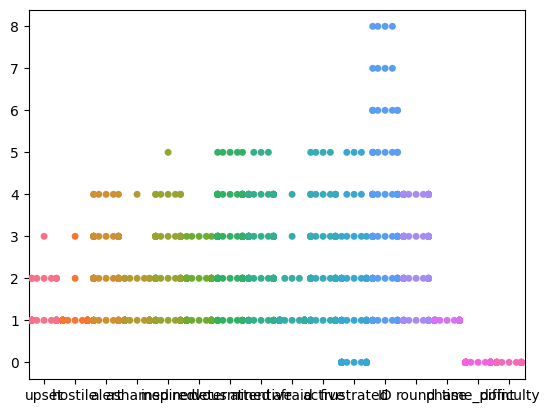

In [22]:
sns.swarmplot(data = df_response[df_response['phase'] == 1])

/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 89.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seabor

<Axes: >

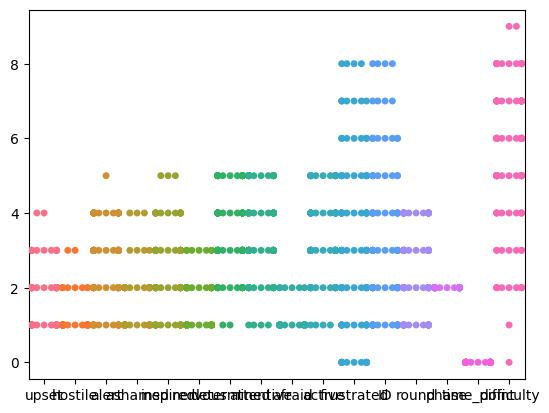

In [23]:
sns.swarmplot(data = df_response[df_response['phase'] == 2])

In [30]:
for i in range(1, 4):
    print(df_response[df_response['phase'] == i].describe())

            upset     hostile       alert     ashamed    inspired     nervous  \
count  104.000000  104.000000  104.000000  104.000000  102.000000  104.000000   
mean     1.105769    1.028846    1.990385    1.096154    2.049020    1.451923   
std      0.338995    0.218411    0.919003    0.382105    0.988823    0.589220   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    2.000000    1.000000    2.000000    1.000000   
75%      1.000000    1.000000    3.000000    1.000000    3.000000    2.000000   
max      3.000000    3.000000    4.000000    4.000000    5.000000    3.000000   

       determined   attentive      afraid      active  frustrated          ID  \
count  103.000000  103.000000  103.000000  103.000000  104.000000  104.000000   
mean     2.796117    2.611650    1.077670    2.184466    1.076923    3.192308   
std      1.096869    1.0500

In [37]:
mean_emo[['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'determined', 'attentive', 'afraid', 'active', 'frustrated']]

,upset,hostile,alert,ashamed,inspired,nervous,determined,attentive,afraid,active,frustrated
phase,,,,,,,,,,,
1,1.105769,1.028846,1.990385,1.096154,2.049020,1.451923,2.796117,2.611650,1.077670,2.184466,1.076923
2,1.663462,1.115385,2.701923,1.403846,2.461538,1.451923,3.394231,3.355769,1.057692,3.278846,3.201923
3,1.269231,1.028846,1.884615,1.163462,2.038462,1.240385,2.543689,2.384615,1.019231,2.192308,1.788462


/tmp/ipykernel_7487/1769132324.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_emo = df_response.groupby('phase').mean()


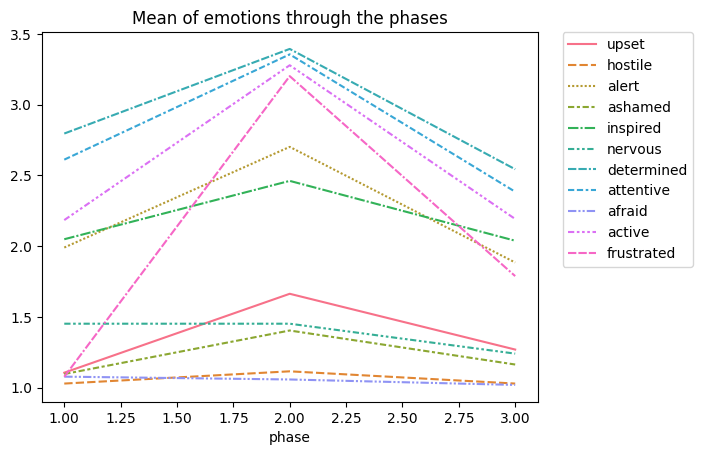

In [83]:
# the mean of the emotions through the phases

mean_emo = df_response.groupby('phase').mean()

#plot the mean of the emotions through the phases

sns.lineplot(data=mean_emo[['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'determined', 'attentive', 'afraid', 'active', 'frustrated']] ).set(title='Mean of emotions through the phases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


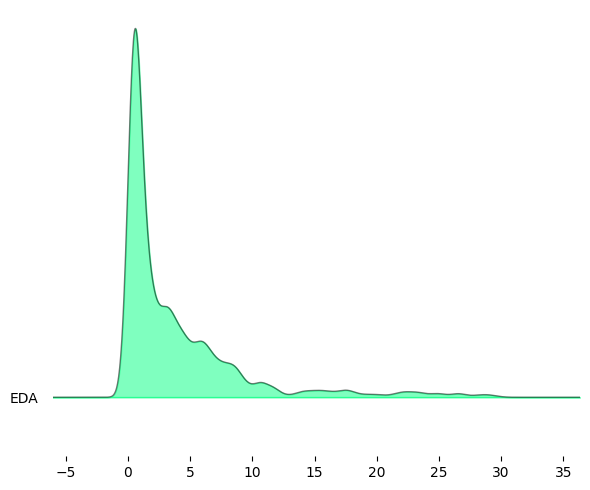

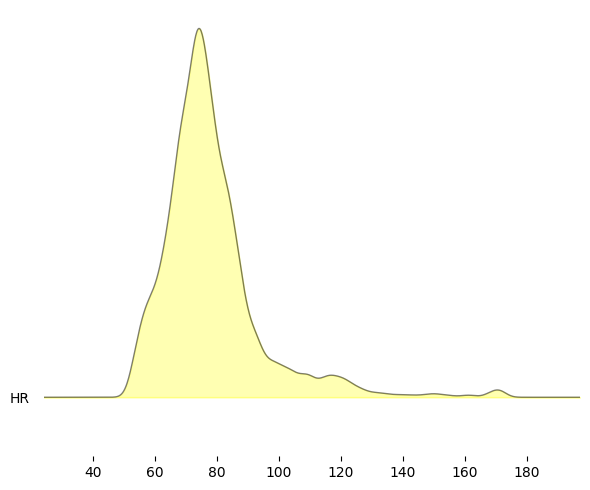

In [81]:
fig, axes = joypy.joyplot(df_EDA[df_EDA.phase == 1], column='EDA',linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.winter_r, alpha = 0.5)
fig, axes = joypy.joyplot(df_HR[df_HR.phase == 1], column='HR',linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.summer_r, alpha = 0.5)
plt.show()

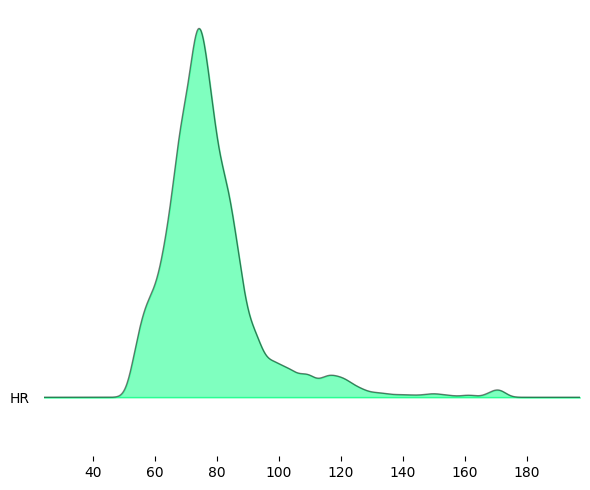

In [71]:
fig, axes = joypy.joyplot(df_HR[df_HR.phase == 1], column='HR',linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.winter_r, alpha = 0.5)

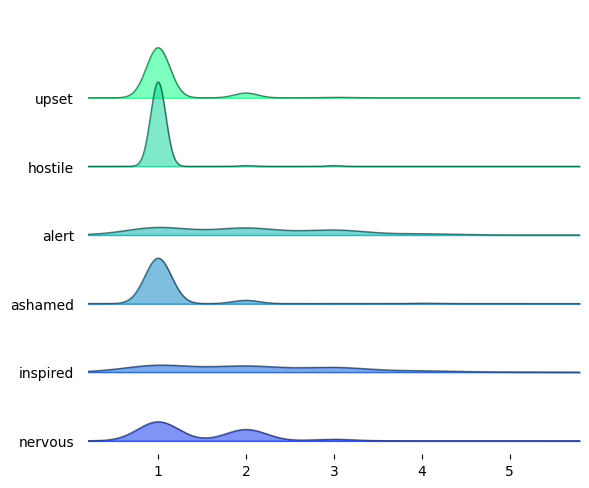

In [87]:
import joypy
from matplotlib import cm

%matplotlib inline
fig, axes = joypy.joyplot(df_response[df_response.phase == 1],  column=['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.winter_r, alpha = 0.5, overlap=0.5)

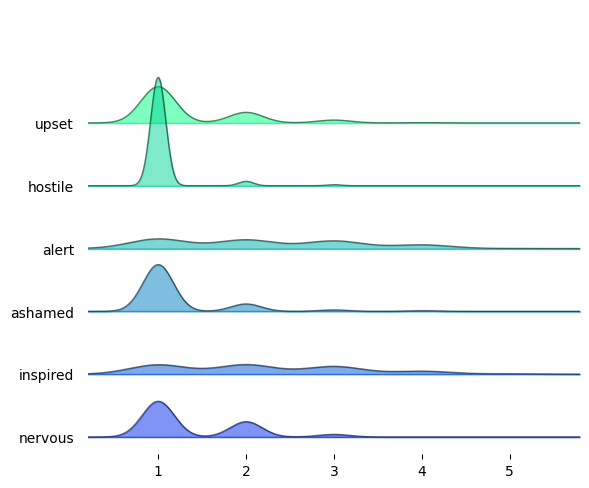

In [79]:
fig, axes = joypy.joyplot(df_response,  column=['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.winter_r, alpha = 0.5)

<Axes: xlabel='phase'>

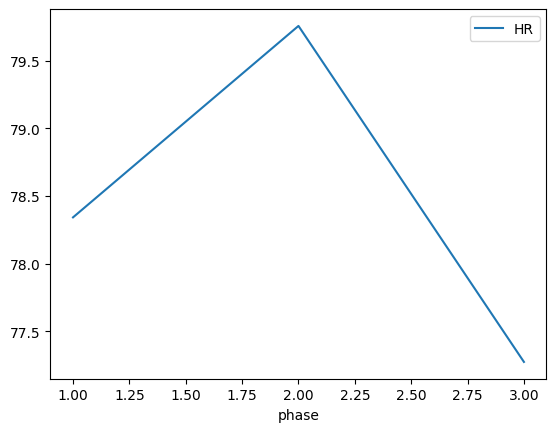

In [42]:
mean_HR = df_HR.groupby('phase').mean()
sns.lineplot(data=mean_HR[['HR']] )

/tmp/ipykernel_7487/2928587334.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_EDA = df_EDA.groupby('phase').mean()


<Axes: xlabel='phase'>

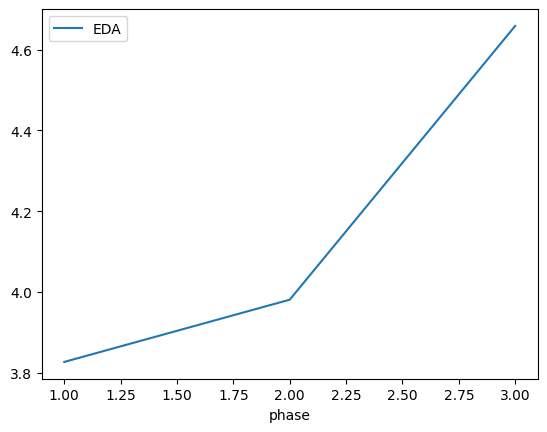

In [43]:
mean_EDA = df_EDA.groupby('phase').mean()
sns.lineplot(data=mean_EDA[['EDA']] )

In [49]:
mean_BVP = df_BVP.groupby(['phase','ID']).mean()
mean_BVP
# sns.lineplot(data=mean_BVP[['BVP']] , hue='ID')

/tmp/ipykernel_7487/1711514650.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_BVP = df_BVP.groupby(['phase','ID']).mean()


BVP     round    time_point
phase ID                                  
1     1  -0.002543  2.467067   9810.927088
      2  -0.004279  2.512823   9468.738036
      3  -0.003228  2.438752   9946.245458
      4   0.154033  2.475753   9482.972659
      5  -0.030249  2.434150  10608.229058
      6  -0.007906  2.412488  10482.932402
      7   0.081072  2.377922  11432.551993
      8  -0.053003  2.340297  11165.792167
2     1  -0.056968  2.470364  10304.386503
      2  -0.004718  2.493919  10080.141714
      3  -0.025724  2.476625  10355.997610
      4   0.019361  2.459487  10350.337301
      5   0.034454  2.429292  10566.586030
      6  -0.032103  2.483426  10085.383569
      7  -0.057829  2.464770  10365.919228
      8  -0.010676  2.431888  11389.925719
3     1  -0.002706  2.476612   9819.865935
      2  -0.010164  2.477502   9820.454374
      3  -0.023401  2.463911   9791.859461
      4  -0.015811  2.466877   9748.296325
      5  -0.009711  2.486620   9936.937397
      6   0.035061  2.503845   9798.354941
      7  -0.080686  2.497881   9955.491997
      8   0.071948  2.415318  10495.902469

In [48]:
df_BVP

,BVP,time,group,ID,round,phase,time_point,sub_group
0,-61.33,2021-12-17 16:11:54.953125,D1_1,1,1,1,0,NaN
1,-56.25,2021-12-17 16:11:54.968750,D1_1,1,1,1,1,NaN
2,-47.83,2021-12-17 16:11:54.984375,D1_1,1,1,1,2,NaN
3,-35.69,2021-12-17 16:11:55.000000,D1_1,1,1,1,3,NaN
4,-20.53,2021-12-17 16:11:55.015625,D1_1,1,1,1,4,NaN
...,...,...,...,...,...,...,...,...
19369,87.59,2022-10-28 17:00:31.984375,D1_3,2,4,3,19369,D1_3_4
19370,90.72,2022-10-28 17:00:32.000000,D1_3,2,4,3,19370,D1_3_4
19371,95.53,2022-10-28 17:00:32.015625,D1_3,2,4,3,19371,D1_3_4
19372,101.95,2022-10-28 17:00:32.031250,D1_3,2,4,3,19372,D1_3_4


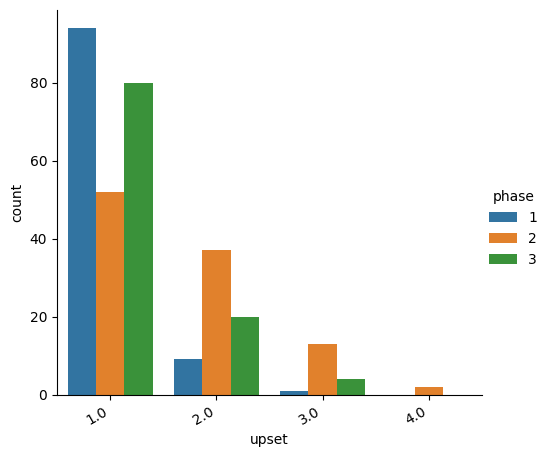

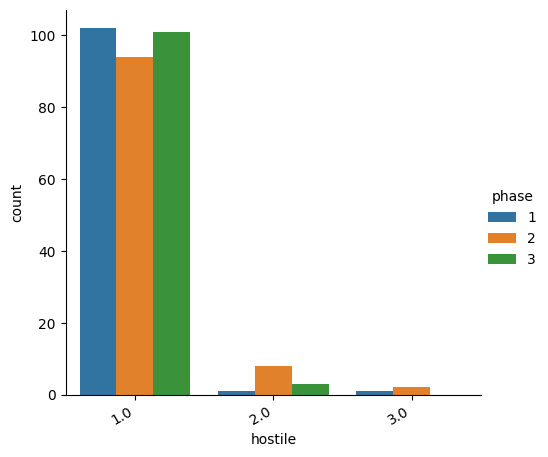

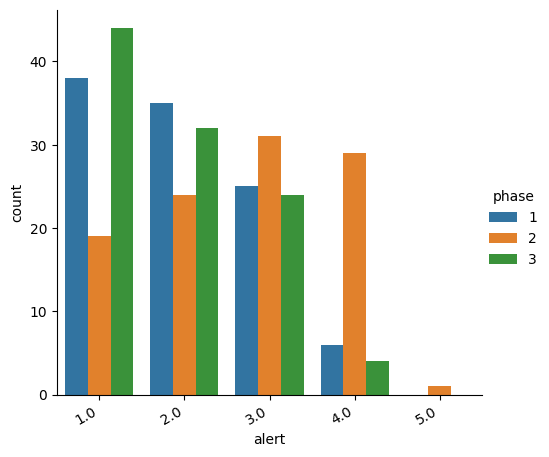

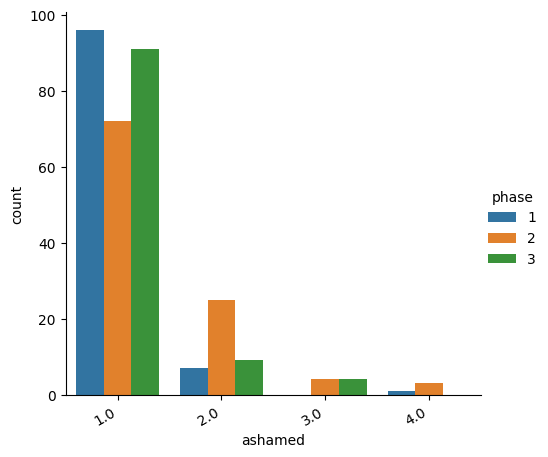

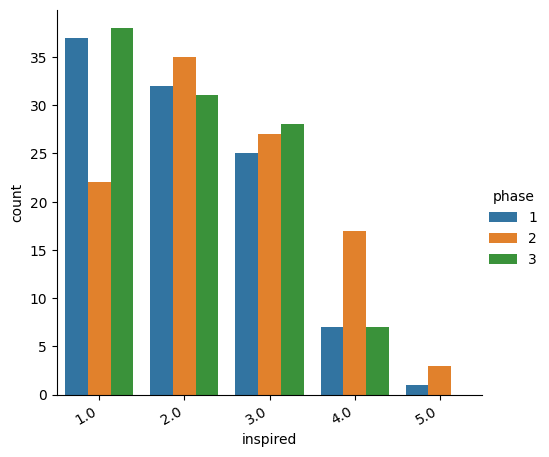

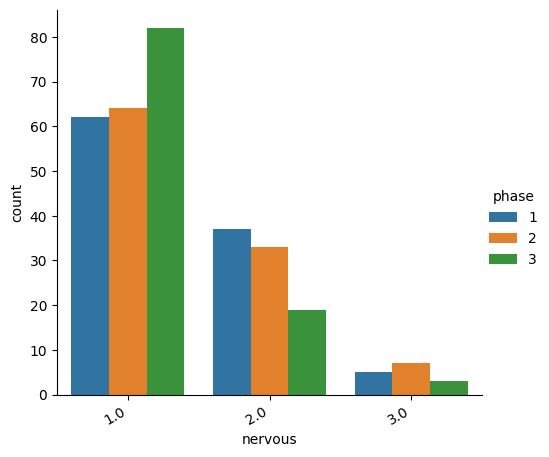

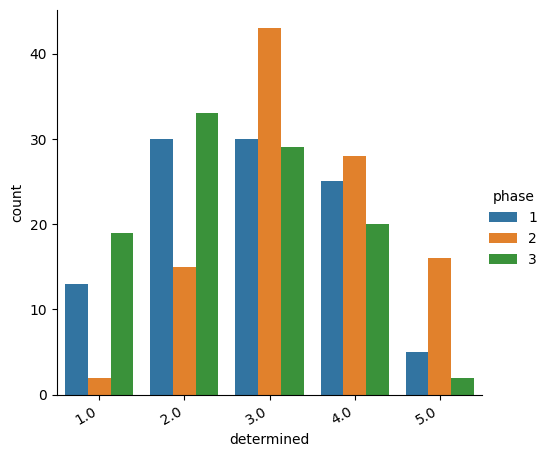

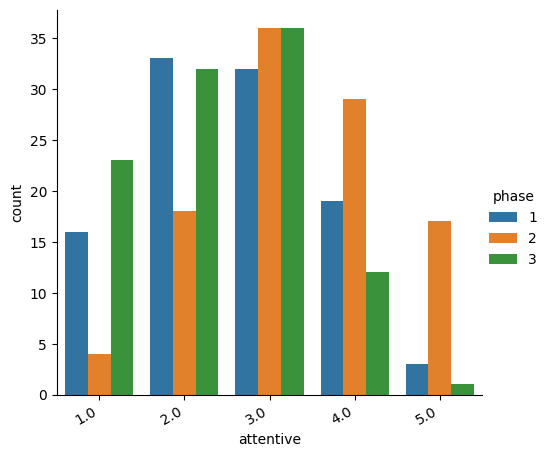

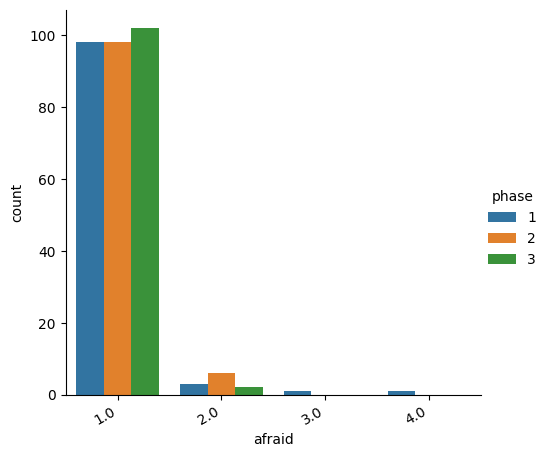

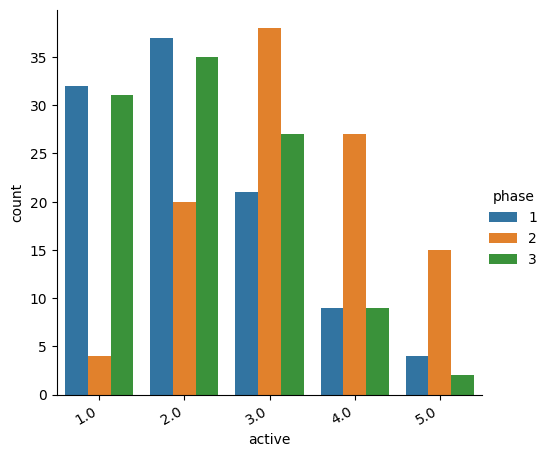

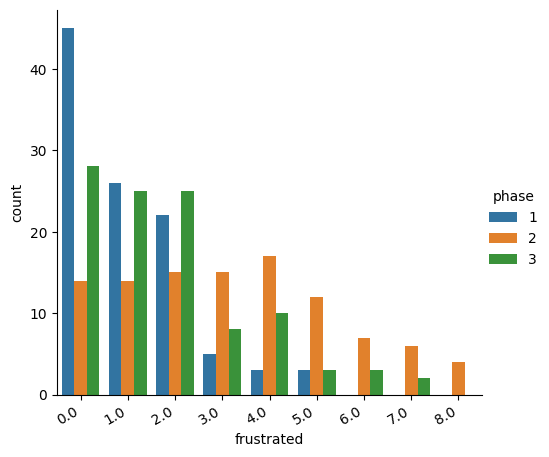

In [32]:
emotions = ['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'determined', 'attentive', 'afraid', 'active', 'frustrated']
for i in emotions:
    ax = sns.catplot(x=i,kind='count',data=df_response,orient="h", hue="phase")
    ax.fig.autofmt_xdate()
     

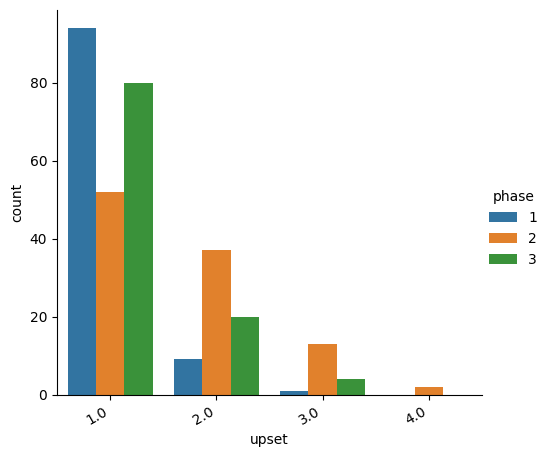

In [27]:
ax = sns.catplot(x='upset',kind='count',data=df_response,orient="h", hue="phase")
ax.fig.autofmt_xdate()

/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='afraid', ylabel='determined'>

/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


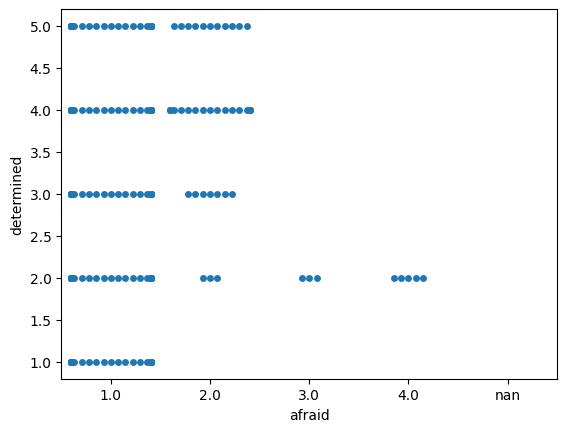

In [18]:
sns.swarmplot(x = "afraid", y = "determined", data = df_res_EDA_HR_500) #(with kind=”swarm”)

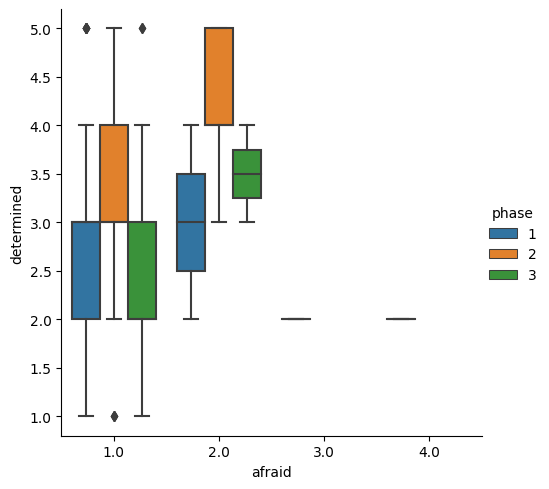

In [16]:
sns.catplot(x = "afraid", y = "determined",kind='box',hue='phase',data=df_merged)


In [1]:
for i in range(1,4):
    heatmap = sns.heatmap(df_res_EDA_HR_500[df_res_EDA_HR_500.phase == i].corr(), vmin=-0.3, vmax=1, annot=False)
    # title 
    title = "Phase " + str(i)
    plt.show()

NameError: name 'sns' is not defined

/tmp/ipykernel_5686/47855629.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_merged[df_merged.phase == i].corr(), vmin=-0.3, vmax=1, annot=False)


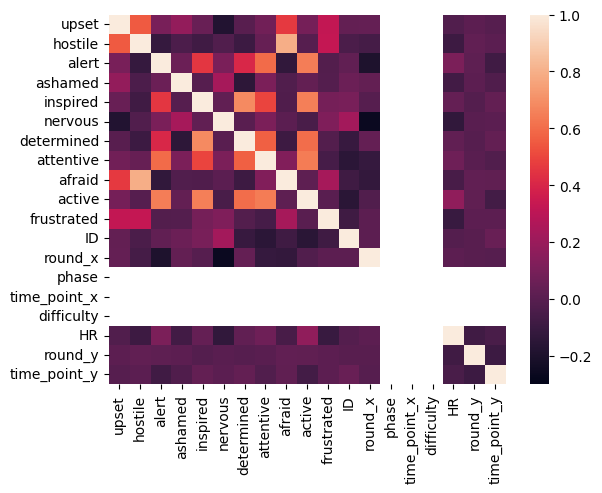

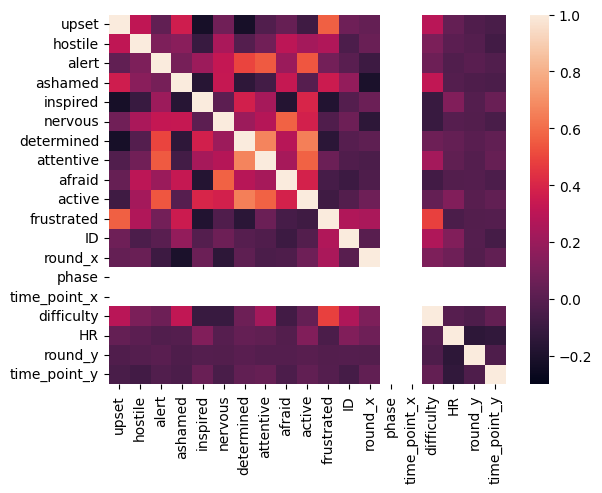

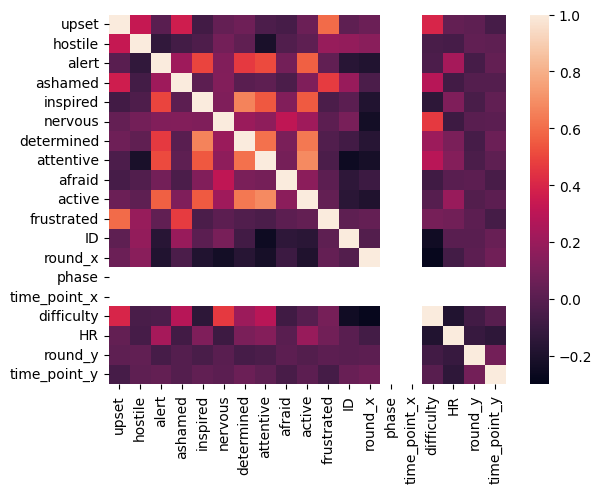

In [34]:
# heatmap of df_merged
for i in range(1,4):
    heatmap = sns.heatmap(df_merged[df_merged.phase == i].corr(), vmin=-0.3, vmax=1, annot=False)
    # title 
    title = "Phase " + str(i)
    plt.show()
# heatmap = sns.heatmap(df_merged[df_merged.phase == 2].corr(), vmin=-0.3, vmax=1, annot=False)



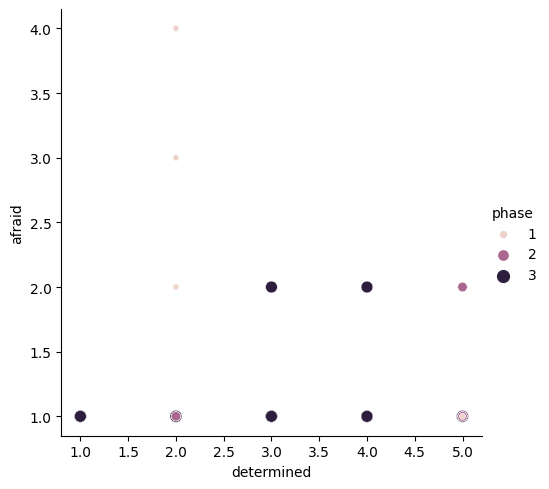

In [17]:
sns.relplot(x="determined", y="afraid", data=df_merged, hue = "phase", size="phase")

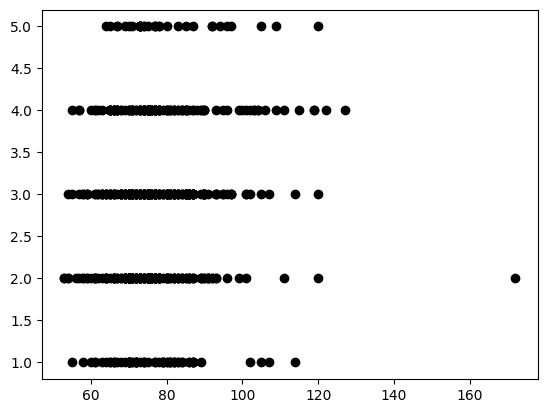

In [18]:
plt.plot(np.round(df_merged['HR']), df_merged['determined'], 'o', color='black')

<Axes: xlabel='phase', ylabel='HR'>

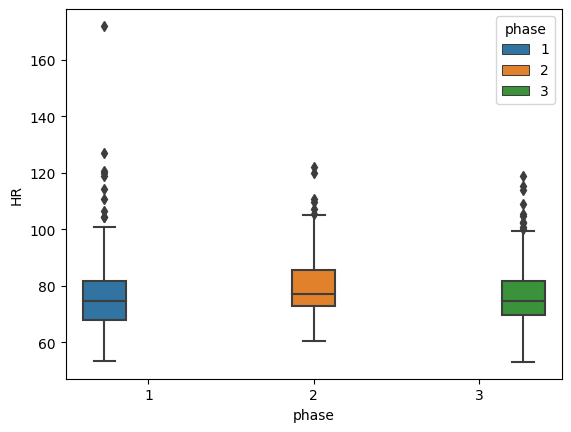

In [19]:
# make a boxplot of the HR for each phase

sns.boxplot(data=df_merged, x='phase', y='HR', hue='phase')

<Axes: xlabel='phase'>

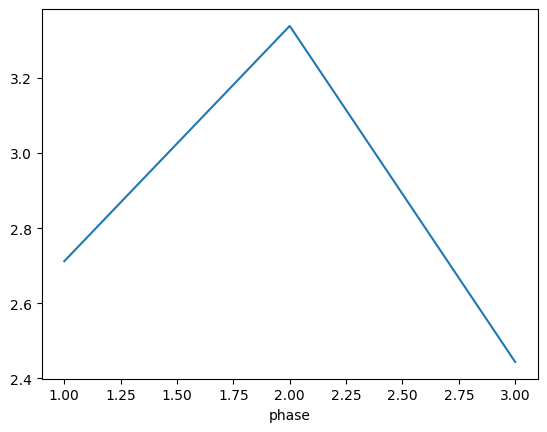

In [20]:
df_merged['determined'].groupby(df_merged['phase']).mean().plot()

<Axes: xlabel='phase'>

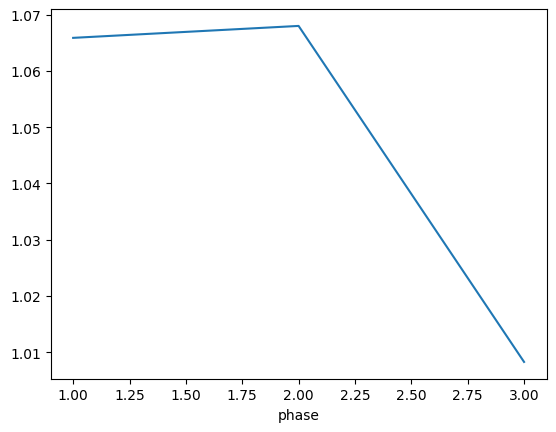

In [13]:
df_merged['afraid'].groupby(df_merged['phase']).mean().plot()

<Axes: xlabel='determined', ylabel='afraid'>

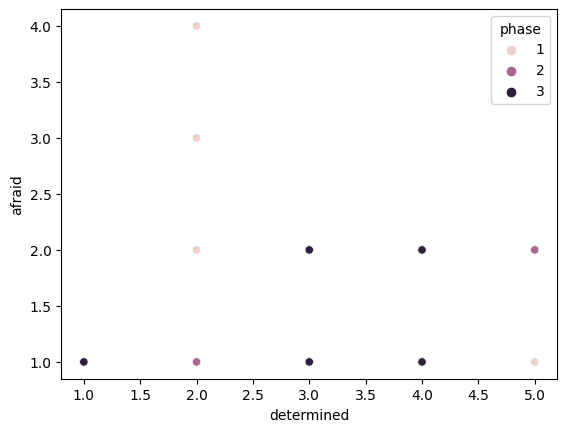

In [14]:
# correlation between the HR and the afraid response

sns.scatterplot(data=df_merged, x='determined', y='afraid', hue='phase')

In [ ]:
# correlation 

In [25]:
# plot the HR and the alert

# sns.scatterplot(data=df_merged, x='HR', y="alert", hue="phase")

<Axes: xlabel='HR', ylabel='alert'>

Error in callback <function _draw_all_if_interactive at 0x7f86a6999630> (for post_execute):


KeyboardInterrupt: 